<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# Introducción

En este ejercicio generaremos un árbol de decisión que a través de Regresión, nos permita predecir si una persona sufrirá diabetes o no

## DataSet: Pacientes Enfermos con Diabetes

Se obtuvieron diez variables basales, edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para cada uno de n = 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad un año después del inicio .

* age: age in years
* sex
* bmi: body mass index
* bp: average blood pressure
* s1: T-Cells (a type of white blood cells)
* s2: low-density lipoproteins
* s3: high-density lipoproteins
* s4: thyroid stimulating hormone
* s5: lamotrigine
* s6: blood sugar level

Objetivo: medida cuantitativa de la progresión de la enfermedad.


## Antes de modelar

### Cargamos y preparamos el dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
datos = load_diabetes()

X = pd.DataFrame(datos.data, columns=datos.feature_names)
Y = datos.target

In [2]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [3]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Modelamiento (primeros pasos)

Usando la librería SKLEARN, generaremos un árbol de decisión para regresión

**INDICA QUE SIGNIFICAN CADA UNA DE LAS VARIABLES SIGUIENTES Y QUE INDICAN LAS MEDIDAS DE VERIFICACION USADAS.**

In [4]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(X, Y)

Yhat = mo2.predict(X)

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y, Yhat)
mae = mean_absolute_error(Y, Yhat)
R2 = r2_score(Y, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.0
MAE:  0.0
R^2:  1.0


se ve sobreajuste por que los valores son los mejores optimos


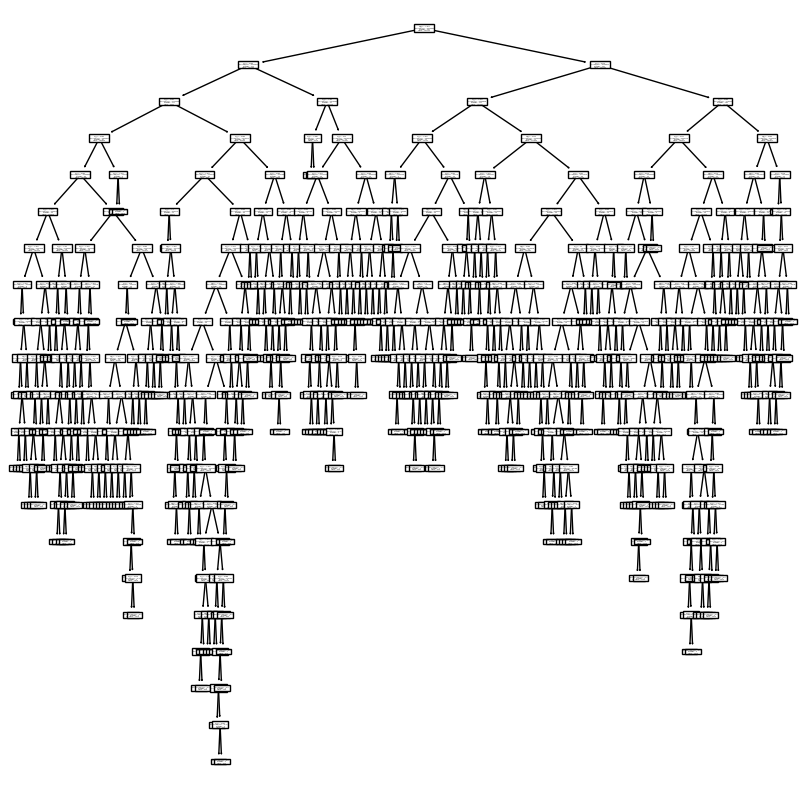

In [6]:
# Visualizamos el árbol generado!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo2) 

## Evitando el Overfitting

**INDICA : ¿por qué existe OVERFITTING?**

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(Xtrain, Ytrain)

Yhat = mo2.predict(Xtest)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  5410.449438202248
MAE:  58.741573033707866
R^2:  0.033866218234724355


In [9]:
1 - sum((Ytest - Yhat)**2)/sum((Ytest - Ytest.mean())**2)
#sum((Yhat - Ytest.mean())**2)/sum((Ytest - Ytest.mean())**2)

0.03386621823472458

In [10]:
mo2.feature_importances_

array([0.04139488, 0.00872916, 0.35784673, 0.11782354, 0.05352769,
       0.07605711, 0.04580081, 0.02267952, 0.19193967, 0.0842009 ])

In [11]:
Xtrain.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Sintonización del modelo

**INDICA :** 

¿cómo se realiza esta sintonización?

 ¿qué hiperparámetros se están modificando?

 ¿qué ocurre si ingresas otros valores?....prueba



In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [14]:
print(grid.best_score_)
print(grid.best_params_)

0.3806701944125271
{'max_depth': 3, 'min_samples_split': 2}


In [15]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002981,0.000841,0.001816,0.000779,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.409886,0.152925,0.492581,0.307391,0.322583,0.501014,0.410593,0.424667,0.421092,0.363969,0.380670,0.096548,1
1,0.002677,0.000432,0.001545,0.000264,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.409886,0.152925,0.492581,0.307391,0.322583,0.501014,0.410593,0.424667,0.421092,0.363969,0.380670,0.096548,1
2,0.002688,0.000190,0.001592,0.000148,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.409886,0.152925,0.492581,0.307391,0.322583,0.501014,0.410593,0.424667,0.421092,0.363969,0.380670,0.096548,1
3,0.002725,0.000192,0.001484,0.000071,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.448848,-0.064788,0.576251,0.233904,0.219615,0.245865,0.451965,0.353856,0.145760,0.485218,0.309649,0.181235,4
4,0.002544,0.000062,0.001395,0.000035,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.448848,-0.064788,0.576251,0.233904,0.219615,0.245865,0.451965,0.353856,0.145760,0.485218,0.309649,0.181235,4
5,0.002629,0.000087,0.001499,0.000170,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.448848,-0.064788,0.576251,0.233904,0.219615,0.245865,0.451965,0.353856,0.145760,0.485218,0.309649,0.181235,4
6,0.002833,0.000456,0.001380,0.000048,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.394067,-0.383860,0.509253,0.087541,0.100033,0.172666,0.345399,0.232383,-0.121125,0.410246,0.174660,0.257036,8
7,0.003102,0.000444,0.001710,0.000359,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.394067,-0.383860,0.450156,0.087541,0.100033,0.157335,0.345399,0.232383,-0.121125,0.431562,0.169349,0.252018,9
8,0.003065,0.000501,0.001613,0.000330,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.309936,-0.215227,0.509253,0.087541,0.100033,0.157335,0.345399,0.232383,-0.105025,0.432152,0.185378,0.217160,7


**Usar otra función de scoring/loss para elegir el "mejor" modelo**

**INVESTIGA** COMO SE USAN ESTAS FUNCIONES



*   Funciones pre-definidas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

*   Funciones personalizadas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [16]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='r2')

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.3806701944125271
{'max_depth': 3, 'min_samples_split': 2}


In [18]:
#pd.DataFrame(grid.cv_results_).head()
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

mean_fit_time                                              0.003098
std_fit_time                                               0.000906
mean_score_time                                            0.001821
std_score_time                                             0.000439
param_max_depth                                                   3
param_min_samples_split                                           2
params                     {'max_depth': 3, 'min_samples_split': 2}
split0_test_score                                          0.409886
split1_test_score                                          0.152925
split2_test_score                                          0.492581
split3_test_score                                          0.307391
split4_test_score                                          0.322583
split5_test_score                                          0.501014
split6_test_score                                          0.410593
split7_test_score                               

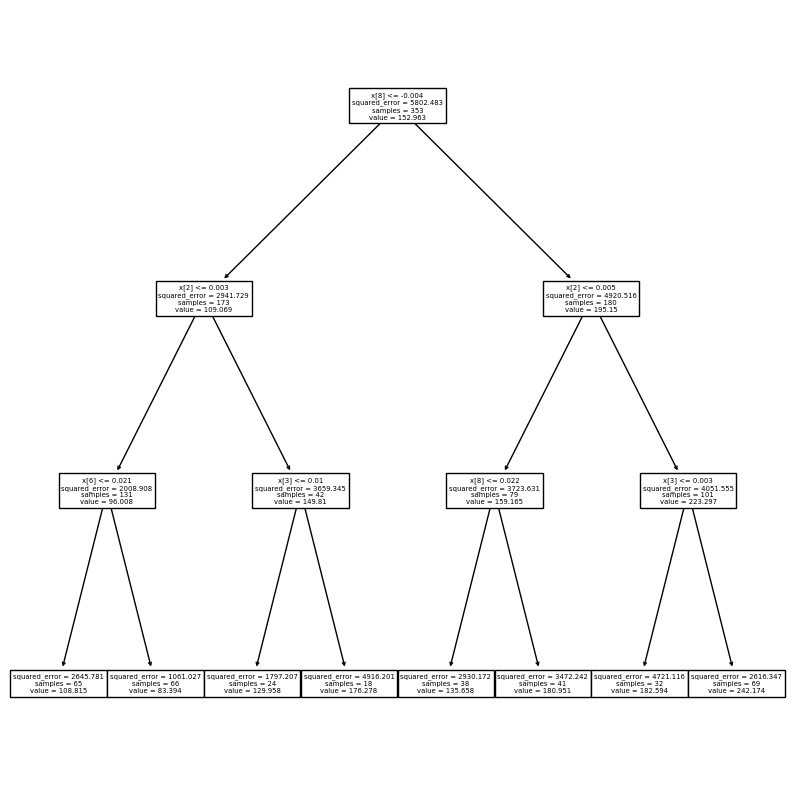

In [19]:
# Visualizamos el árbol ganador!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(grid.best_estimator_) 

### Graficamos los resultamos estimados

4699.525805301141
55.85326980536066
0.26817337324691937


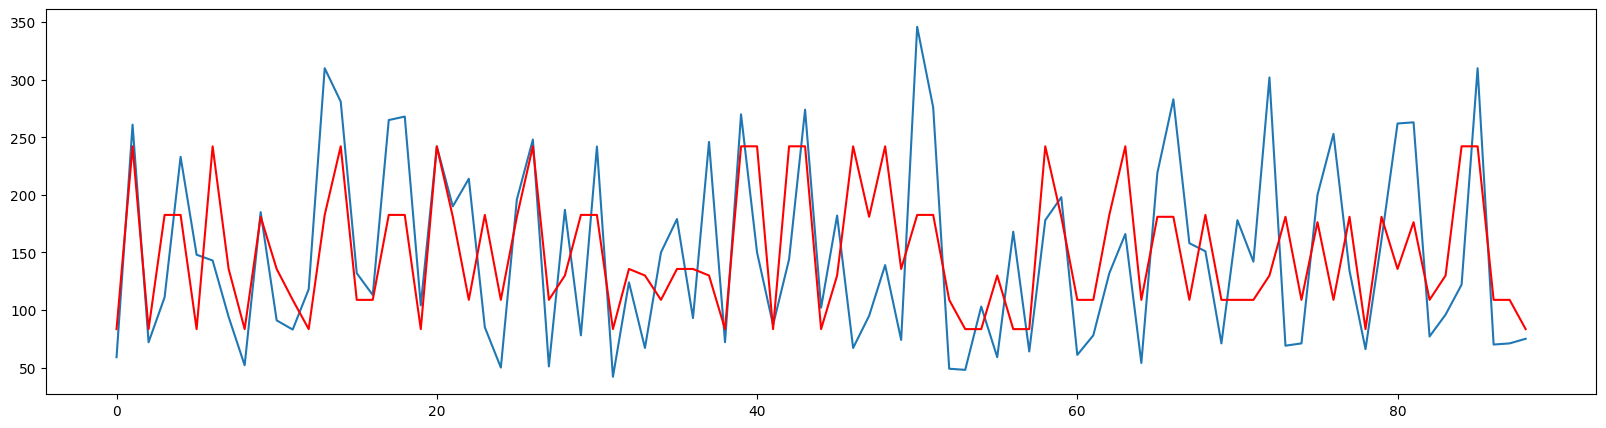

In [20]:
Yhat = grid.predict(Xtest)

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

import matplotlib.pyplot as plt
plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(Yhat, 'r')

In [21]:
np.unique(Yhat)

array([ 83.39393939, 108.81538462, 129.95833333, 135.65789474,
       176.27777778, 180.95121951, 182.59375   , 242.17391304])

In [22]:
Yhat

array([ 83.39393939, 242.17391304,  83.39393939, 182.59375   ,
       182.59375   ,  83.39393939, 242.17391304, 135.65789474,
        83.39393939, 180.95121951, 135.65789474, 108.81538462,
        83.39393939, 182.59375   , 242.17391304, 108.81538462,
       108.81538462, 182.59375   , 182.59375   ,  83.39393939,
       242.17391304, 180.95121951, 108.81538462, 182.59375   ,
       108.81538462, 180.95121951, 242.17391304, 108.81538462,
       129.95833333, 182.59375   , 182.59375   ,  83.39393939,
       135.65789474, 129.95833333, 108.81538462, 135.65789474,
       135.65789474, 129.95833333,  83.39393939, 242.17391304,
       242.17391304,  83.39393939, 242.17391304, 242.17391304,
        83.39393939, 129.95833333, 242.17391304, 180.95121951,
       242.17391304, 135.65789474, 182.59375   , 182.59375   ,
       108.81538462,  83.39393939,  83.39393939, 129.95833333,
        83.39393939,  83.39393939, 242.17391304, 180.95121951,
       108.81538462, 108.81538462, 182.59375   , 242.17

# CONCLUSIONES

Reflexiona sobre lo realizado y explica:

¿qué indica el árbol ganador? ¿por qué es un "ganador"?

¿que efectos tienen el manejar los hiperparámetros?

Comparte tus conclusiones con la clase.